In [7]:
import torch
import torch.nn as nn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

In [34]:
train = pd.read_csv("test.csv")
test = pd.read_csv("test.csv")

In [35]:
train.head()

,ID,datetime,temperature,var1,pressure,windspeed,var2
0,552,2013-07-24 00:00:00,-10.0,-16.4,1011.0,263.280,A
1,553,2013-07-24 01:00:00,-10.0,-20.7,1011.0,267.175,A
2,554,2013-07-24 02:00:00,-10.7,-17.1,1003.0,269.555,A
3,555,2013-07-24 03:00:00,-13.6,-20.7,1008.0,273.060,A
4,556,2013-07-24 04:00:00,-10.7,-17.1,1006.0,1.765,A


In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8568 entries, 0 to 8567
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           8568 non-null   int64  
 1   datetime     8568 non-null   object 
 2   temperature  8568 non-null   float64
 3   var1         8568 non-null   float64
 4   pressure     8568 non-null   float64
 5   windspeed    8568 non-null   float64
 6   var2         8568 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 468.7+ KB


In [37]:
train.describe()

,ID,temperature,var1,pressure,windspeed
count,8568.000000,8568.000000,8568.000000,8568.000000,8568.000000
mean,17766.525210,5.112757,-1.726401,986.329599,24.176398
std,10117.296415,8.606167,10.345034,12.148517,49.651535
min,552.000000,-17.900000,-26.400000,954.000000,1.075000
25%,9317.750000,-2.100000,-10.000000,977.000000,3.155000
50%,18083.500000,5.700000,-2.100000,987.000000,6.295000
75%,26297.250000,12.100000,7.900000,995.000000,21.907500
max,35063.000000,25.700000,17.900000,1023.000000,491.255000


In [38]:
#temperature data만 뽑기
train_temp_numpy = train['temperature'].to_numpy()
print("Data의 크기 : ", len(train_temp_numpy))

Data의 크기 :  8568


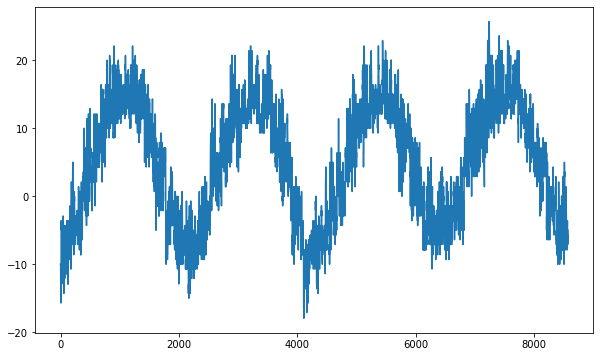

In [39]:
plt.figure(figsize = (10,6))
plt.plot(range(len(train_temp_numpy)), train_temp_numpy)
plt.show()

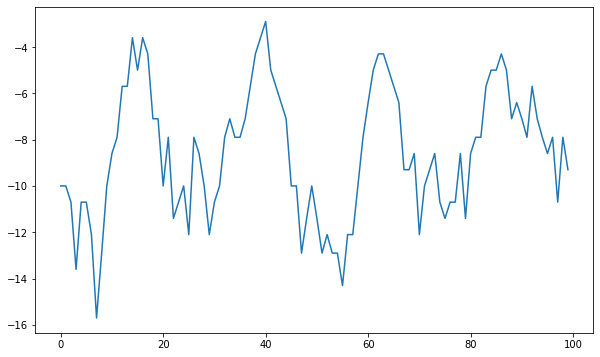

In [40]:
#part of data
plt.figure(figsize = (10,6))
plt.plot(range(100), train_temp_numpy[:100])
plt.show()

In [41]:
#hyperparameter
window_size = 10

#np init
train_X = np.array([train_temp_numpy[:window_size]])
train_y = np.array([train_temp_numpy[window_size]])

for i in range(1,len(train_temp_numpy) - window_size - 2):
  train_X = np.concatenate((train_X, [train_temp_numpy[i:i+window_size]]), axis = 0)
  train_y = np.concatenate((train_y, [train_temp_numpy[i+window_size]]), axis = 0)

print("train_X shape", train_X.shape)
print("train_y shape", train_y.shape)

train_X shape (8556, 10)
train_y shape (8556,)


In [42]:
for i in range(10):
  print(train_X[i], train_y[i])

[-10.  -10.  -10.7 -13.6 -10.7 -10.7 -12.1 -15.7 -12.9 -10. ] -8.6
[-10.  -10.7 -13.6 -10.7 -10.7 -12.1 -15.7 -12.9 -10.   -8.6] -7.9
[-10.7 -13.6 -10.7 -10.7 -12.1 -15.7 -12.9 -10.   -8.6  -7.9] -5.7
[-13.6 -10.7 -10.7 -12.1 -15.7 -12.9 -10.   -8.6  -7.9  -5.7] -5.7
[-10.7 -10.7 -12.1 -15.7 -12.9 -10.   -8.6  -7.9  -5.7  -5.7] -3.6
[-10.7 -12.1 -15.7 -12.9 -10.   -8.6  -7.9  -5.7  -5.7  -3.6] -5.0
[-12.1 -15.7 -12.9 -10.   -8.6  -7.9  -5.7  -5.7  -3.6  -5. ] -3.6
[-15.7 -12.9 -10.   -8.6  -7.9  -5.7  -5.7  -3.6  -5.   -3.6] -4.3
[-12.9 -10.   -8.6  -7.9  -5.7  -5.7  -3.6  -5.   -3.6  -4.3] -7.1
[-10.   -8.6  -7.9  -5.7  -5.7  -3.6  -5.   -3.6  -4.3  -7.1] -7.1


In [43]:
train_X_tensor = torch.FloatTensor(train_X)
train_y_tensor = torch.FloatTensor(train_y)

train_X_tensor.view(-1,1,window_size)

print("Tensor X size : ", train_X_tensor.shape)
print("Tensor Y size : ", train_y_tensor.shape)

Tensor X size :  torch.Size([8556, 10])
Tensor Y size :  torch.Size([8556])


In [44]:
pt_dict = {train_X_tensor[i]: train_y_tensor[i] for i in range(len(train_temp_numpy) - window_size - 2)}

In [45]:
torch.save(pt_dict, 'test.pt')